In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sb
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("C:/Users/97155/Downloads/term-deposit-marketing-2020.csv")


In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [4]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [5]:
duplicates = data[data.duplicated()]
duplicates

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y


In [6]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

Text(0, 0.5, 'Count')

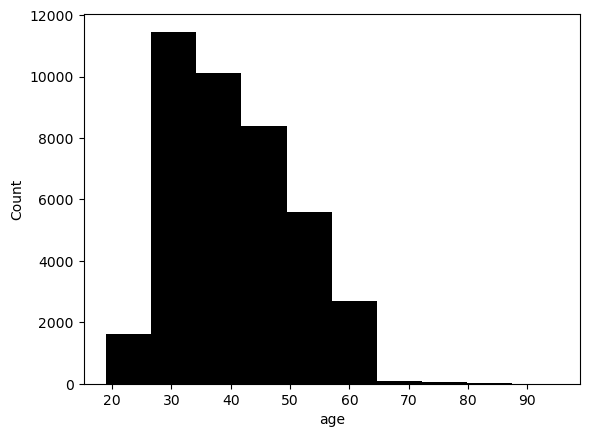

In [7]:
plt.hist(data[data.columns[0]],color="black")

plt.xlabel("age")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

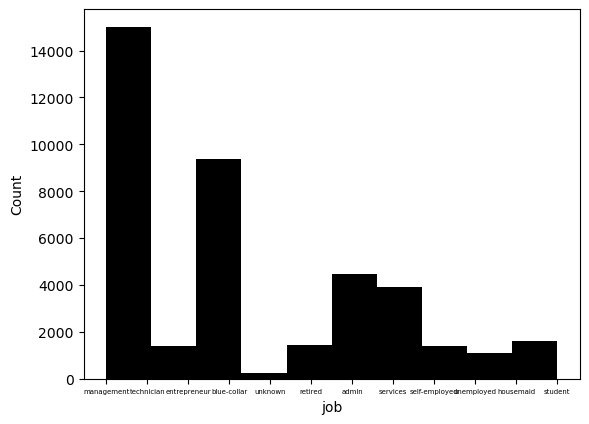

In [8]:
plt.hist(data[data.columns[1]],color="black")
plt.xticks(fontsize=5)

plt.xlabel("job")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

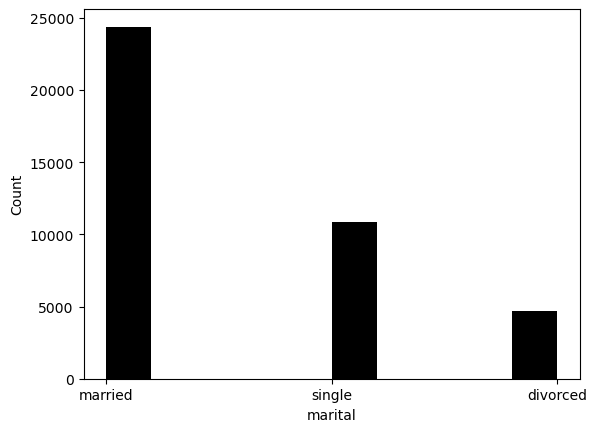

In [9]:
plt.hist(data[data.columns[2]],color="black")

plt.xlabel("marital")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

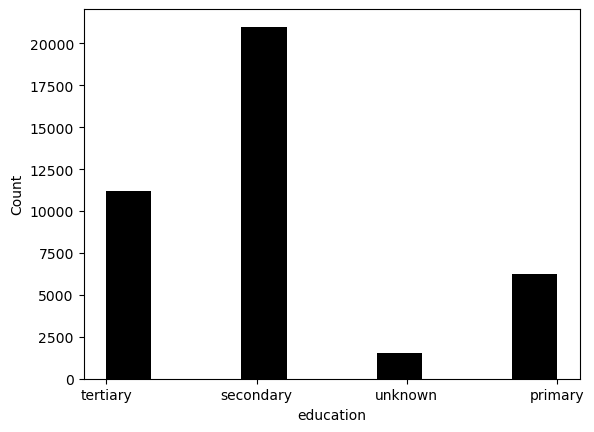

In [10]:
plt.hist(data[data.columns[3]],color="black")

plt.xlabel("education")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

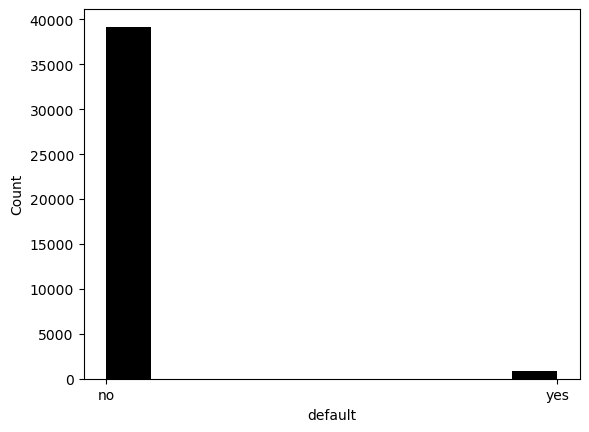

In [11]:
plt.hist(data[data.columns[4]],color="black")

plt.xlabel("default")
plt.ylabel("Count")

(0.0, 30000.0)

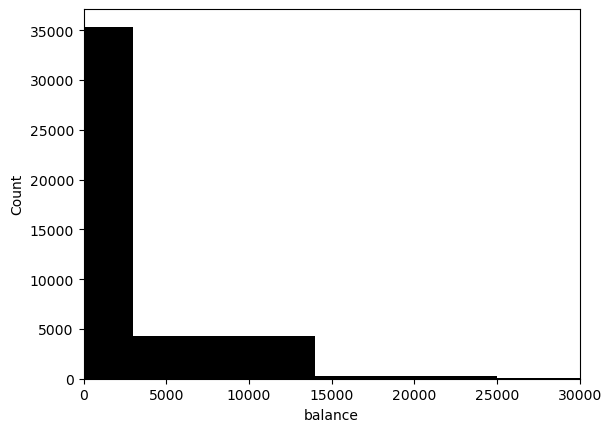

In [12]:
plt.hist(data[data.columns[5]],color="black")

plt.xlabel("balance")
plt.ylabel("Count")
plt.xlim(0,30000)

Text(0, 0.5, 'Count')

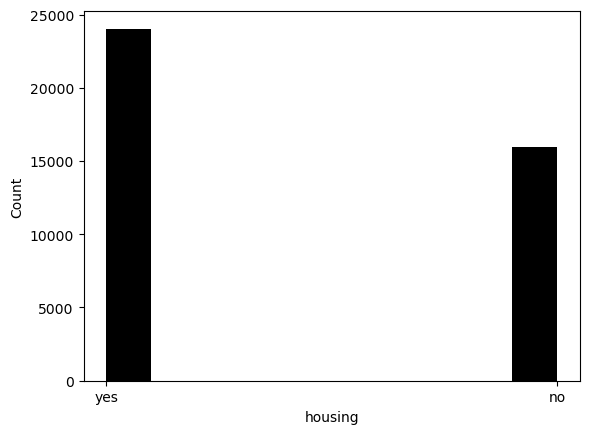

In [13]:
plt.hist(data[data.columns[6]],color="black")

plt.xlabel("housing")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

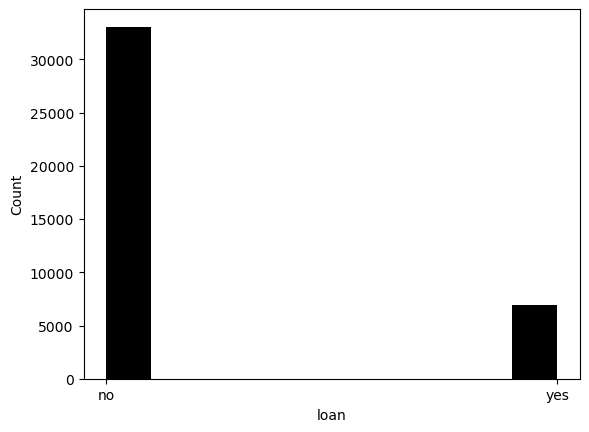

In [14]:
plt.hist(data[data.columns[7]],color="black")

plt.xlabel("loan")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

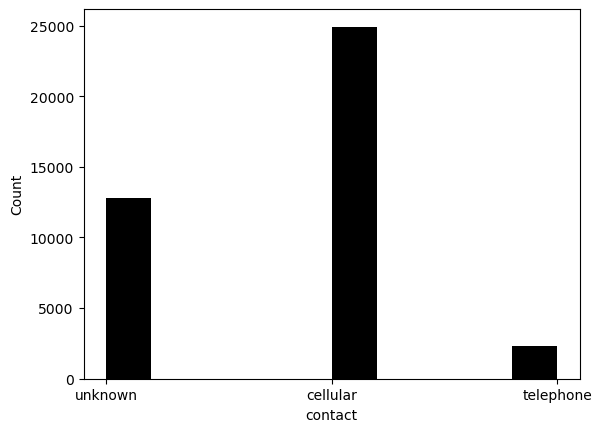

In [15]:
plt.hist(data[data.columns[8]],color="black")

plt.xlabel("contact")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

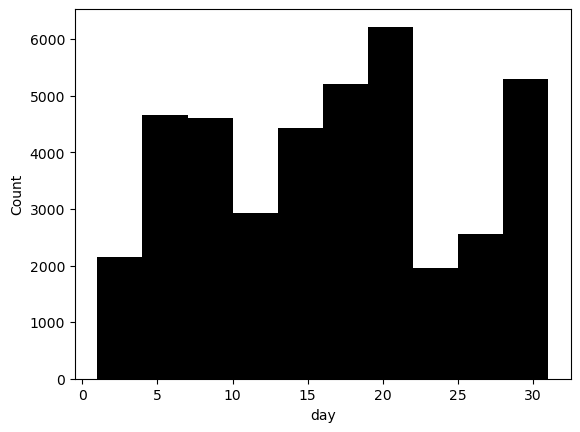

In [16]:
plt.hist(data[data.columns[9]],color="black")

plt.xlabel("day")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

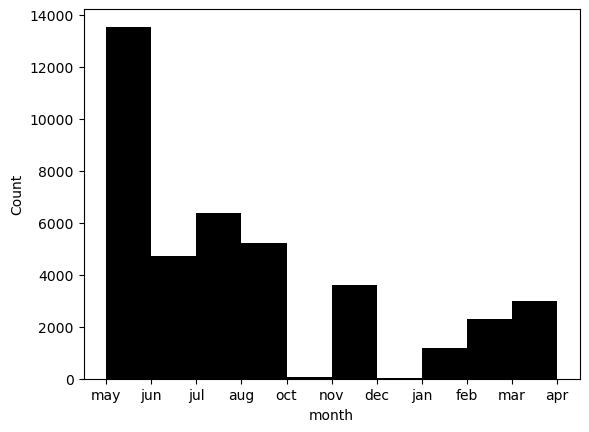

In [17]:
plt.hist(data[data.columns[10]],color="black")

plt.xlabel("month")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

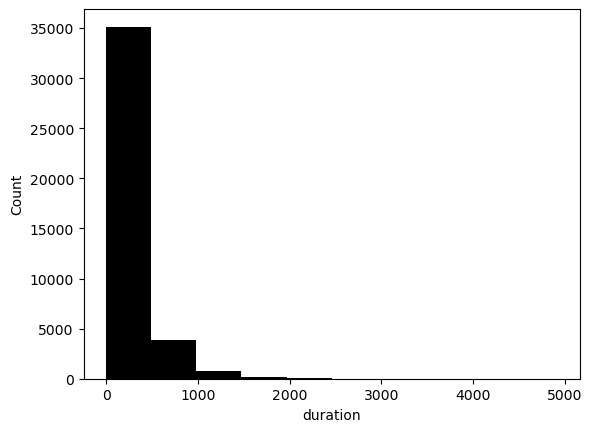

In [18]:
plt.hist(data[data.columns[11]],color="black")

plt.xlabel("duration")
plt.ylabel("Count")

In [19]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [20]:
data["y"].value_counts()

no     37104
yes     2896
Name: y, dtype: int64

In [33]:
threshold = 37104/(37104+2896)
threshold

0.9276

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data["y"]=label_encoder.fit_transform(data["y"])

In [35]:
encoded_data["y"].value_counts()

0    37104
1     2896
Name: y, dtype: int64

In [36]:
categorical_columns = data.select_dtypes(include=['object']).columns

encoded_data = pd.get_dummies(data, columns=categorical_columns)

In [37]:
encoded_data

,age,balance,day,duration,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,2143,5,261,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,44,29,5,151,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,33,2,5,76,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,47,1506,5,92,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,33,1,5,198,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,395,3,107,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39996,30,3340,3,238,3,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39997,54,200,3,170,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39998,34,1047,3,342,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [38]:
encoded_data.shape

(40000, 45)

In [39]:
import category_encoders as ce


encoder = ce.BinaryEncoder(cols=categorical_columns)

Binary_encoded_data = encoder.fit_transform(data)

Binary_encoded_data

,age,job_0,job_1,job_2,job_3,marital_0,marital_1,education_0,education_1,education_2,...,contact_0,contact_1,day,month_0,month_1,month_2,month_3,duration,campaign,y
0,58,0,0,0,1,0,1,0,0,1,...,0,1,5,0,0,0,1,261,1,0
1,44,0,0,1,0,1,0,0,1,0,...,0,1,5,0,0,0,1,151,1,0
2,33,0,0,1,1,0,1,0,1,0,...,0,1,5,0,0,0,1,76,1,0
3,47,0,1,0,0,0,1,0,1,1,...,0,1,5,0,0,0,1,92,1,0
4,33,0,1,0,1,1,0,0,1,1,...,0,1,5,0,0,0,1,198,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,0,0,1,0,0,1,0,0,1,...,1,0,3,0,0,1,0,107,1,0
39996,30,0,0,0,1,1,0,0,0,1,...,1,0,3,0,0,1,0,238,3,1
39997,54,0,1,1,1,1,1,0,1,0,...,1,0,3,0,0,1,0,170,1,1
39998,34,0,0,0,1,0,1,0,0,1,...,1,0,3,0,0,1,0,342,1,0


In [40]:
Binary_encoded_data.shape

(40000, 27)

In [41]:
Binary_encoded_data.dtypes

age            int64
job_0          int64
job_1          int64
job_2          int64
job_3          int64
marital_0      int64
marital_1      int64
education_0    int64
education_1    int64
education_2    int64
default_0      int64
default_1      int64
balance        int64
housing_0      int64
housing_1      int64
loan_0         int64
loan_1         int64
contact_0      int64
contact_1      int64
day            int64
month_0        int64
month_1        int64
month_2        int64
month_3        int64
duration       int64
campaign       int64
y              int64
dtype: object

In [42]:
from scipy.stats import pearsonr

per = {}
for i in range(Binary_encoded_data.shape[1]):
    pearsonr_corr,p_value = pearsonr(Binary_encoded_data[Binary_encoded_data.columns[i]],Binary_encoded_data["y"])
    per[Binary_encoded_data.columns[i]]=pearsonr_corr

In [43]:
per

{'age': -0.020272758609339338,
 'job_0': -0.00024641629886167256,
 'job_1': -0.005291490559787775,
 'job_2': 0.009997800052485569,
 'job_3': 0.015912307919374584,
 'marital_0': 0.05686314936214118,
 'marital_1': -0.05172070959325668,
 'education_0': -0.02678589271012579,
 'education_1': -0.022704781666662562,
 'education_2': 0.04200356207131052,
 'default_0': -0.006559450432287847,
 'default_1': 0.006559450432287709,
 'balance': 0.030231775493465583,
 'housing_0': 0.0543362592559394,
 'housing_1': -0.05433625925593938,
 'loan_0': -0.031029257930387744,
 'loan_1': 0.031029257930387744,
 'contact_0': 0.0884083446254876,
 'contact_1': -0.08543345914225983,
 'day': -0.006419829994187739,
 'month_0': 0.105507341880044,
 'month_1': -0.02012622899144781,
 'month_2': 0.03757267346314108,
 'month_3': 0.023843211097344347,
 'duration': 0.46116936434094824,
 'campaign': -0.04035025879326478,
 'y': 1.0}

# under sampling

In [98]:
import pandas as pd

seed = 1

minority_samples = Binary_encoded_data[Binary_encoded_data['y'] == 1]

num_minority_samples = len(minority_samples)
majority_samples = Binary_encoded_data[Binary_encoded_data['y'] == 0].sample(n=num_minority_samples, random_state=seed)

undersampled_data = pd.concat([minority_samples, majority_samples])

undersampled_features = undersampled_data.drop('y', axis=1)
undersampled_target = undersampled_data['y']
undersampled_target=pd.DataFrame(undersampled_target)
undersampled_target.value_counts()

y
0    2896
1    2896
dtype: int64

In [99]:
undersampled_features=undersampled_features.drop(["day"],axis=1)
undersampled_features

,age,job_0,job_1,job_2,job_3,marital_0,marital_1,education_0,education_1,education_2,...,loan_0,loan_1,contact_0,contact_1,month_0,month_1,month_2,month_3,duration,campaign
83,59,0,1,1,1,0,1,0,1,0,...,0,1,0,1,0,0,0,1,1042,1
86,56,0,1,1,1,0,1,0,1,0,...,0,1,0,1,0,0,0,1,1467,1
87,41,0,0,1,0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,1389,1
129,55,1,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,579,1
168,54,0,1,1,1,0,1,0,0,1,...,0,1,0,1,0,0,0,1,673,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7094,24,1,1,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,1,127,4
10189,57,1,0,1,1,0,1,1,0,0,...,0,1,0,1,0,0,1,0,201,5
272,57,0,0,1,0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,10,4
3589,58,0,0,0,1,0,1,0,0,1,...,0,1,0,1,0,0,0,1,850,6


In [143]:
outlier = {}
for i in range(undersampled_data.shape[1]):
    min_=undersampled_data[undersampled_data.columns[i]].mean()-(3*undersampled_data[undersampled_data.columns[i]].std())
    max_=undersampled_data[undersampled_data.columns[i]].mean()+(3*undersampled_data[undersampled_data.columns[i]].std())
    count=0
    for j in undersampled_data[undersampled_data.columns[i]]:
        if j < min_ or j > max_:
            count += 1
    outlier[undersampled_data.columns[i]]= [count,undersampled_data.shape[0]]

print(outlier)

{'age': [36, 5792], 'job_0': [0, 5792], 'job_1': [0, 5792], 'job_2': [0, 5792], 'job_3': [0, 5792], 'marital_0': [0, 5792], 'marital_1': [0, 5792], 'education_0': [0, 5792], 'education_1': [0, 5792], 'education_2': [0, 5792], 'default_0': [108, 5792], 'default_1': [108, 5792], 'balance': [93, 5792], 'housing_0': [0, 5792], 'housing_1': [0, 5792], 'loan_0': [0, 5792], 'loan_1': [0, 5792], 'contact_0': [0, 5792], 'contact_1': [0, 5792], 'day': [0, 5792], 'month_0': [0, 5792], 'month_1': [0, 5792], 'month_2': [0, 5792], 'month_3': [0, 5792], 'duration': [71, 5792], 'campaign': [109, 5792], 'y': [0, 5792]}


([<matplotlib.patches.Wedge at 0x2f4b3d304c0>,
 [Text(1.0981484205873293, 0.06379691498461404, 'outliers'),
  Text(-1.0981484153608647, -0.06379700494867972, 'undersampled_data')],
 [Text(0.5989900475930887, 0.034798317264334924, '1.85%'),
  Text(-0.5989900447422898, -0.03479836633564348, '98.15%')])

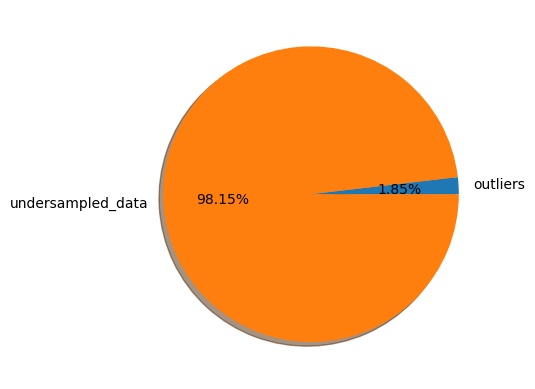

In [144]:
label = ["outliers","undersampled_data"]
plt.pie(outlier['campaign'],labels=label,shadow=True,autopct='%.2f%%')

In [100]:
features = Binary_encoded_data.drop(["y"],axis=1)
target=Binary_encoded_data["y"]

In [101]:
px.box(undersampled_data,x=undersampled_data["y"],y=undersampled_data[undersampled_data.columns[25]]).update_traces(marker_color="black").update_layout(template="seaborn")

In [102]:
#outliers in age , balance, duration, campaign(25)

In [103]:
px.box(Binary_encoded_data,x=Binary_encoded_data["y"],y=Binary_encoded_data[Binary_encoded_data.columns[25]]).update_traces(marker_color="black").update_layout(template="seaborn")

In [104]:
features

,age,job_0,job_1,job_2,job_3,marital_0,marital_1,education_0,education_1,education_2,...,loan_1,contact_0,contact_1,day,month_0,month_1,month_2,month_3,duration,campaign
0,58,0,0,0,1,0,1,0,0,1,...,1,0,1,5,0,0,0,1,261,1
1,44,0,0,1,0,1,0,0,1,0,...,1,0,1,5,0,0,0,1,151,1
2,33,0,0,1,1,0,1,0,1,0,...,0,0,1,5,0,0,0,1,76,1
3,47,0,1,0,0,0,1,0,1,1,...,1,0,1,5,0,0,0,1,92,1
4,33,0,1,0,1,1,0,0,1,1,...,1,0,1,5,0,0,0,1,198,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,0,0,1,0,0,1,0,0,1,...,1,1,0,3,0,0,1,0,107,1
39996,30,0,0,0,1,1,0,0,0,1,...,1,1,0,3,0,0,1,0,238,3
39997,54,0,1,1,1,1,1,0,1,0,...,1,1,0,3,0,0,1,0,170,1
39998,34,0,0,0,1,0,1,0,0,1,...,1,1,0,3,0,0,1,0,342,1


In [105]:
from sklearn.preprocessing import MinMaxScaler

scl = MinMaxScaler(feature_range=(0, 1))
features_scl = scl.fit_transform(undersampled_features)

In [107]:
features_scl = pd.DataFrame(features_scl, columns=undersampled_features.columns)
features_scl

,age,job_0,job_1,job_2,job_3,marital_0,marital_1,education_0,education_1,education_2,...,loan_0,loan_1,contact_0,contact_1,month_0,month_1,month_2,month_3,duration,campaign
0,0.526316,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.211394,0.000000
1,0.486842,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.297864,0.000000
2,0.289474,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.281994,0.000000
3,0.473684,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.117192,0.000000
4,0.460526,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.136317,0.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787,0.065789,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.025229,0.083333
5788,0.500000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.040285,0.111111
5789,0.500000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.001424,0.083333
5790,0.513158,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.172330,0.138889


In [108]:
corr=data.corr()
corr

,age,balance,day,duration,campaign,y
age,1.000000,0.081517,-0.011689,-0.036270,0.016204,-0.020273
balance,0.081517,1.000000,0.011662,0.014072,-0.008137,0.030232
day,-0.011689,0.011662,1.000000,-0.032983,0.165429,-0.006420
duration,-0.036270,0.014072,-0.032983,1.000000,-0.088387,0.461169
campaign,0.016204,-0.008137,0.165429,-0.088387,1.000000,-0.040350
y,-0.020273,0.030232,-0.006420,0.461169,-0.040350,1.000000


<AxesSubplot:>

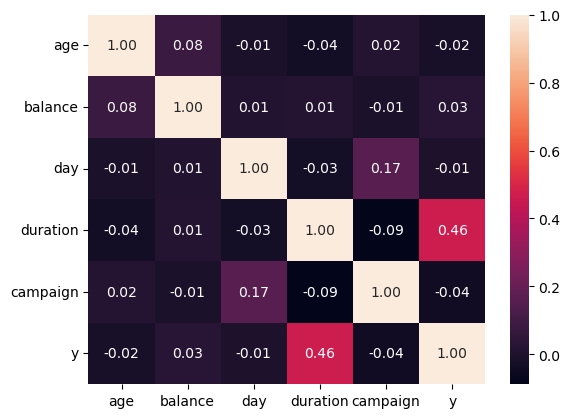

In [110]:
sb.heatmap(corr,annot=True, fmt=".2f")

# Modeling

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [112]:
seed = 1
np.random.seed(seed)
test_size=.20
x_train,x_,y_train,y_ = train_test_split(undersampled_features,undersampled_target,test_size=test_size,random_state=seed)
x_dev,x_test,y_dev,y_test=train_test_split(x_,y_,test_size=0.5,random_state=seed)
print(x_train.shape,x_dev.shape,x_test.shape,y_train.shape,y_dev.shape,y_test.shape)

(4633, 25) (579, 25) (580, 25) (4633, 1) (579, 1) (580, 1)


# Random forist

In [113]:
np.random.seed(seed)

clf_rand = RandomForestClassifier(criterion='gini'
                            ,max_depth=10
                            ,min_samples_split=6
                            ,random_state=seed)

# cross validation

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=1)
scores = cross_val_score(clf_rand, undersampled_features, undersampled_target, cv=kf, scoring='f1_macro')
for i, score in enumerate(scores):
    print(f"Fold {i+1}: F1_score = {score:.4f}")
average_accuracy = scores.mean()
print(f"Average F1_score: {average_accuracy:.4f}")

C:\Users\97155\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\97155\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\97155\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\97155\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\97155\anaconda3

Fold 1: F1_score = 0.8912
Fold 2: F1_score = 0.8722
Fold 3: F1_score = 0.8687
Fold 4: F1_score = 0.8669
Fold 5: F1_score = 0.8478
Average F1_score: 0.8693


# [Training,validation,test]

In [116]:
clf_rand.fit(x_train,y_train)

C:\Users\97155\AppData\Local\Temp\ipykernel_16408\90895019.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(max_depth=10, min_samples_split=6, random_state=1)

In [117]:
np.random.seed(seed)
sets=["Training","validation","test"]
x_sets = [x_train,x_dev,x_test]
y_sets = [y_train,y_dev,y_test]
sources_clf={}
for i in range(0,3):
    y_pre_cls = clf_rand.predict(x_sets[i])
    acc= f1_score(y_sets[i],y_pre_cls)
    sources_clf[sets[i]]= acc
    
sources_clf

{'Training': 0.9234650967199327,
 'validation': 0.8637992831541219,
 'test': 0.9096671949286846}

In [118]:
#i can see that i have a bias coz ny threshold is 92

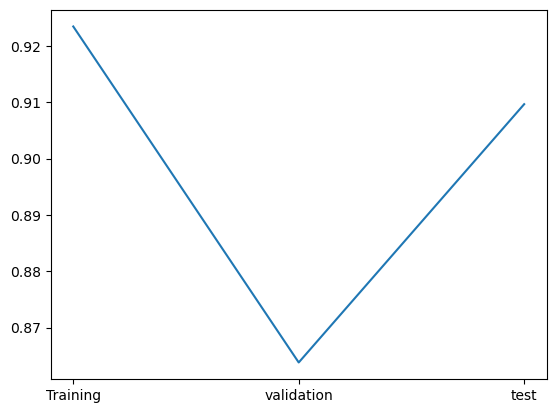

In [119]:
x_values = list(sources_clf.keys())
y_values = list(sources_clf.values())
plt.plot(x_values, y_values)

In [120]:
y_pre = clf_rand.predict(x_test)

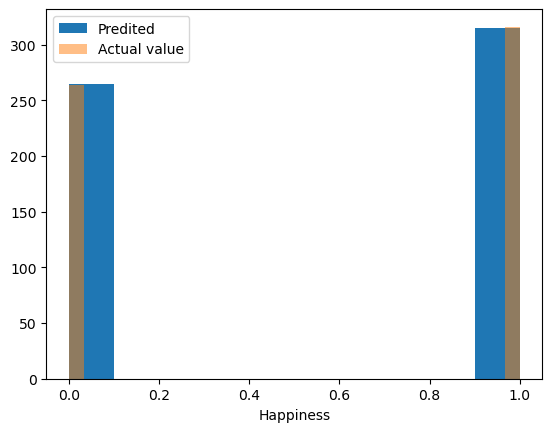

In [121]:
%matplotlib inline
plt.hist(y_pre,label="Predited")

plt.hist(y_test,alpha=0.5,label="Actual value", bins=30)
plt.xlabel("Happiness")
plt.legend()

# XGBoost

In [122]:
np.random.seed(seed)

clf_xg = XGBClassifier(max_depth=10,random_state=seed,reg_lambda=10)

# cross validation

In [123]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=1)
scores_xg = cross_val_score(clf_xg, undersampled_features, undersampled_target, cv=kf, scoring='f1_macro')
for i, score in enumerate(scores_xg):
    print(f"Fold {i+1}: f1_score = {score:.4f}")
average_accuracy_xg = scores_xg.mean()
print(f"Average f1_score: {average_accuracy_xg:.4f}")

Fold 1: f1_score = 0.8886
Fold 2: f1_score = 0.8731
Fold 3: f1_score = 0.8704
Fold 4: f1_score = 0.8720
Fold 5: f1_score = 0.8521
Average f1_score: 0.8712


In [124]:
clf_xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [125]:
np.random.seed(seed)
sets=["Training","validation","test"]
x_sets = [x_train,x_dev,x_test]
y_sets = [y_train,y_dev,y_test]
sources_clf_xg={}
for i in range(0,3):
    y_pre_cls = clf_xg.predict(x_sets[i])
    acc= f1_score(y_sets[i],y_pre_cls)
    sources_clf_xg[sets[i]]= acc
    
sources_clf_xg

{'Training': 0.9971879731775903,
 'validation': 0.8714285714285716,
 'test': 0.9090909090909092}

In [126]:
#i have variance 

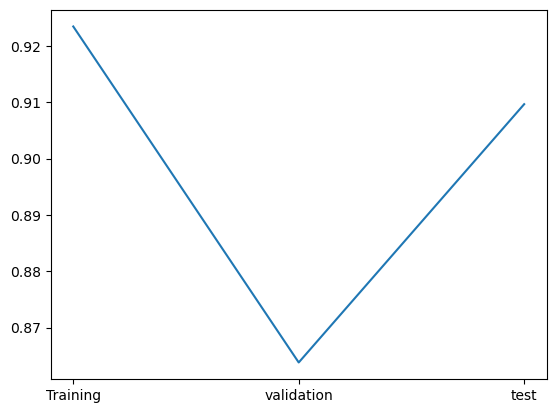

In [127]:
x_values = list(sources_clf.keys())
y_values = list(sources_clf.values())
plt.plot(x_values, y_values)

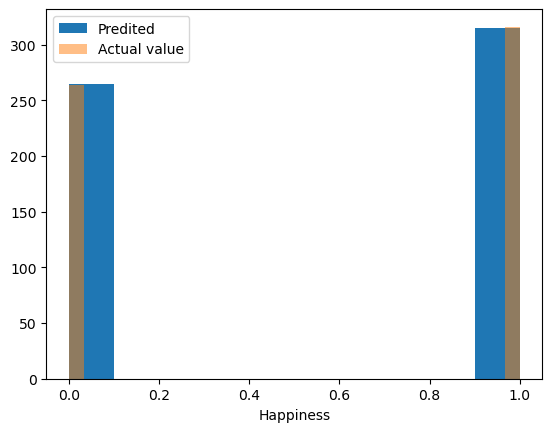

In [128]:
%matplotlib inline
plt.hist(y_pre,label="Predited")

plt.hist(y_test,alpha=0.5,label="Actual value", bins=30)
plt.xlabel("Happiness")
plt.legend()

# over samling

In [129]:
target_one_indices = target[target == 1].index
duplicated_features = pd.concat([features, features.loc[target_one_indices]], ignore_index=True)
duplicated_target = pd.concat([target, target.loc[target_one_indices]], ignore_index=True)


In [130]:
duplicated_features

,age,job_0,job_1,job_2,job_3,marital_0,marital_1,education_0,education_1,education_2,...,loan_1,contact_0,contact_1,day,month_0,month_1,month_2,month_3,duration,campaign
0,58,0,0,0,1,0,1,0,0,1,...,1,0,1,5,0,0,0,1,261,1
1,44,0,0,1,0,1,0,0,1,0,...,1,0,1,5,0,0,0,1,151,1
2,33,0,0,1,1,0,1,0,1,0,...,0,0,1,5,0,0,0,1,76,1
3,47,0,1,0,0,0,1,0,1,1,...,1,0,1,5,0,0,0,1,92,1
4,33,0,1,0,1,1,0,0,1,1,...,1,0,1,5,0,0,0,1,198,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42891,29,0,0,0,1,1,0,0,0,1,...,1,1,0,3,0,0,1,0,340,1
42892,55,0,0,0,1,1,1,0,0,1,...,1,1,0,3,0,0,1,0,591,2
42893,26,0,0,1,0,1,0,0,1,0,...,1,1,0,3,0,0,1,0,385,2
42894,30,0,0,0,1,1,0,0,0,1,...,1,1,0,3,0,0,1,0,238,3


In [131]:
duplicated_target

0        0
1        0
2        0
3        0
4        0
        ..
42891    1
42892    1
42893    1
42894    1
42895    1
Name: y, Length: 42896, dtype: int64

In [132]:
duplicated_target.value_counts()

0    37104
1     5792
Name: y, dtype: int64

In [85]:
thr=37104/(37104+5792)
thr

0.8649757553151809

In [86]:
seed = 1
np.random.seed(seed)
test_size=.30
x_train_dup,x__dup,y_train_dup,y__dup = train_test_split(duplicated_features,duplicated_target,test_size=test_size,random_state=seed)
x_dev_dup,x_test_dup,y_dev_dup,y_test_dup=train_test_split(x__dup,y__dup,test_size=0.5,random_state=seed)
print(x_train_dup.shape,x_dev_dup.shape,x_test_dup.shape,y_train_dup.shape,y_dev_dup.shape,y_test_dup.shape)

(30027, 26) (6434, 26) (6435, 26) (30027,) (6434,) (6435,)


# XGBoost after the duplication

In [87]:
np.random.seed(seed)

clf_xg = XGBClassifier(max_depth=10,random_state=seed,reg_lambda=10)

# cross validation

In [90]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=1)
scores_xg = cross_val_score(clf_xg, duplicated_features, duplicated_target, cv=kf, scoring='f1_macro')
for i, score in enumerate(scores_xg):
    print(f"Fold {i+1}: f1_score = {score:.4f}")
average_accuracy_xg = scores_xg.mean()
print(f"Average f1_score: {average_accuracy_xg:.4f}")

Fold 1: f1_score = 0.8846
Fold 2: f1_score = 0.8942
Fold 3: f1_score = 0.8902
Fold 4: f1_score = 0.8807
Fold 5: f1_score = 0.8859
Average f1_score: 0.8871


In [91]:
clf_xg.fit(x_train_dup,y_train_dup)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [92]:
np.random.seed(seed)
sets=["Training","validation","test"]
x_sets = [x_train_dup,x_dev_dup,x_test_dup]
y_sets = [y_train_dup,y_dev_dup,y_test_dup]
sources_clf_xg={}
for i in range(0,3):
    y_pre_cls = clf_xg.predict(x_sets[i])
    acc= f1_score(y_sets[i],y_pre_cls)
    sources_clf_xg[sets[i]]= acc
    
sources_clf_xg

{'Training': 0.975300980513839,
 'validation': 0.7855530474040632,
 'test': 0.7889476778365667}